In [1]:
import emd
import numpy as np
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
scale = StandardScaler()
asset = 'BTC'
data = pd.read_csv(asset+'_1min.csv',)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [3]:
p = np.array(data['Close'])
p_idx = data['Close']
p_scaled = scale.fit_transform(p.reshape(-1,1))

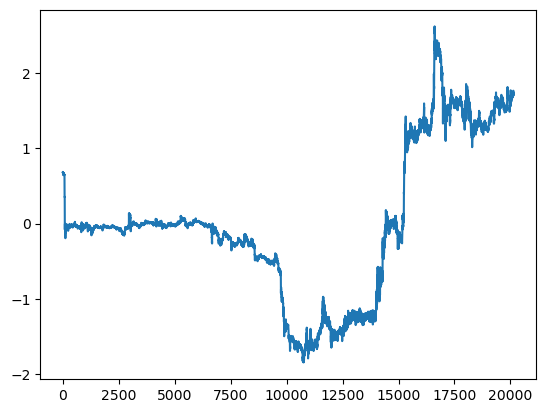

In [4]:
plt.plot(p_scaled)

In [7]:
imf = emd.sift.sift(p_scaled)

In [13]:
last_two = imf[:,-2:].sum(axis=1)
hf_imfs = imf[:,:-2].sum(axis=1)

In [20]:
signal_to_noise = last_two/hf_imfs
noise_to_signal = hf_imfs/last_two

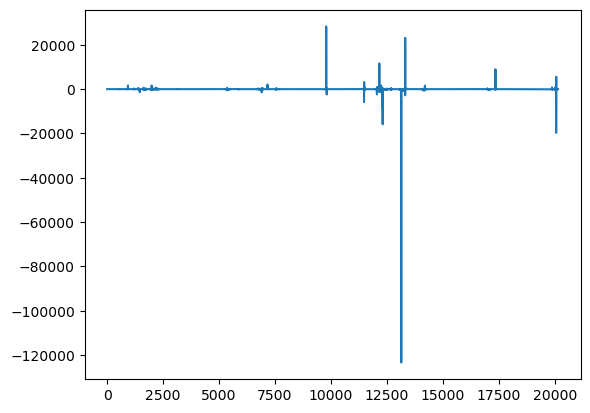

In [32]:
plt.plot(signal_to_noise)

In [51]:
bins = np.linspace(-10, 10, 100)
bin_means = (np.histogram(signal_to_noise, bins, weights=signal_to_noise)[0] /
             np.histogram(signal_to_noise, bins)[0])

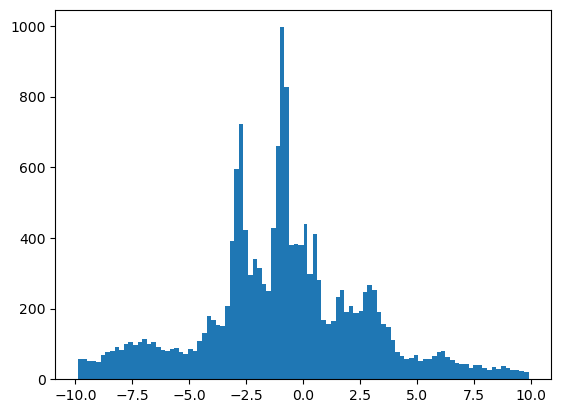

In [52]:
plt.hist(signal_to_noise, bins=bin_means)
plt.show()

In [76]:
sell = signal_to_noise > signal_to_noise.std()*2
buy = signal_to_noise < -signal_to_noise.std()*2

In [112]:
sellx, selly

(array([ 7162,  9787, 11482, 12159, 12160, 13316, 17348, 20065],
       dtype=int64),
 array([-0.19032792, -0.98477723, -1.43748183, -1.47488594, -1.47429885,
        -1.18264591,  1.71083048,  1.66082351]))

In [113]:
buyx, buyy

(array([ 9809, 11477, 12052, 12299, 12309, 13140, 13315, 20061],
       dtype=int64),
 array([-0.9919332 , -1.43609238, -1.47619059, -1.46510112, -1.46429224,
        -1.26027217, -1.18264591,  1.66219991]))

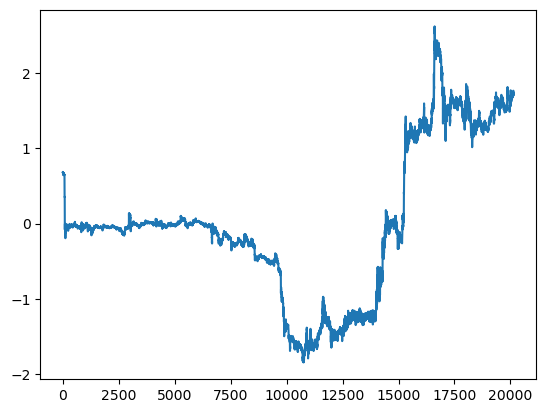

In [111]:
plt.plot(p_scaled)

In [98]:
sellx = sell.nonzero()[0]
selly = p_scaled[sellx].squeeze()

In [102]:
buyx = buy.nonzero()[0]
buyy = p_scaled[buyx].squeeze()

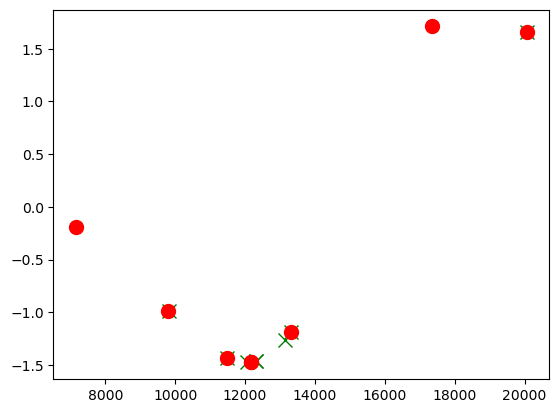

In [114]:
plt.plot(buyx, buyy, "x", color = 'green', markersize=10, label = "Long")
plt.plot(sellx, selly, "o", color = 'red', markersize=10, label = "Short")
#plt.plot(p_scaled)